In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_almond = pd.read_csv('almond.csv')

Fruits per Plant
Unnamed: 0                      0.033848
fruits_per_plant                1.000000
observed_pollinator_richness    0.060248
abundance                       0.498509
ab_honeybee                     0.539960
ab_bombus                      -0.082461
ab_wildbees                    -0.209588
ab_syrphids                     0.039543
ab_humbleflies                  0.120810
ab_other_flies                  0.029516
ab_beetles                     -0.032778
ab_lepidoptera                  0.494651
ab_nonbee_hymenoptera           0.053844
visitation_rate                -0.281515
visit_honeybee                 -0.256187
visit_bombus                   -0.168521
visit_wildbees                 -0.195392
visit_syrphids                 -0.383861
visit_humbleflies               0.120810
visit_other_flies              -0.382425
visit_beetles                  -0.067632
visit_lepidoptera               0.291185
visit_nonbee_hymenoptera       -0.030989
Name: fruits_per_plant, dtype: float64


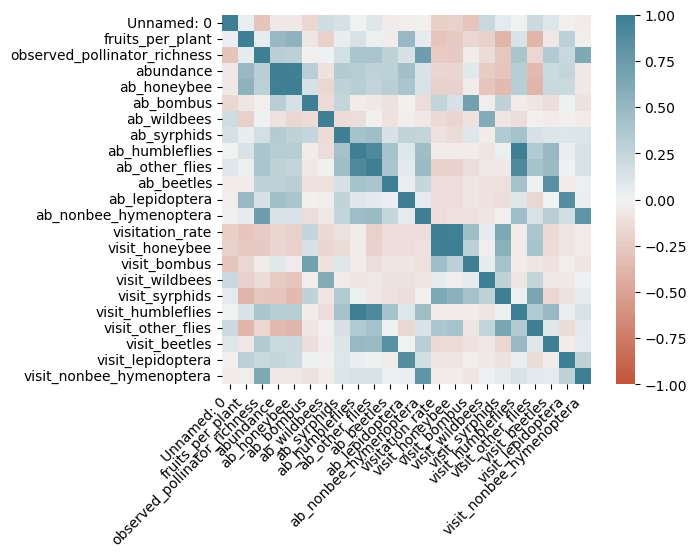

In [9]:
# Select only the numerical columns for correlation
numerical_df_almond = df_almond.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df_almond.corr()

# Create the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Extract the correlations of 'fruits_per_plant' with other columns
almond_yield_corr = corr['fruits_per_plant']

# Display the correlations
print('Fruits per Plant')
print(almond_yield_corr)



In [11]:
# Remove rows where 'fruits per plant' column has missing values
df_almond = df_almond.dropna(subset=['fruits_per_plant'])
df_almond.shape

(34, 26)

Linear regression: Predicting almonds per plant based on total pollinator abundance

In [12]:
# Prepare the data
X = df_almond[['abundance']]  # Feature matrix
y = df_almond['fruits_per_plant']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict 'yield2' values for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
R2 = r2_score(y_test, y_pred)

# Print the model's coefficient and the mean squared error
print("Coefficient for abundance:", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", R2)

Coefficient for abundance: 0.15360028731289918
Intercept: 96.22587808504112
Mean Absolute Error: 158.1384231897798
Mean Squared Error: 42842.30632025791
Root Mean Squared Error: 206.9838310599596
R-squared score: 0.13775460261081085


c:\Users\psabi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.legend(*args, **kwargs)>

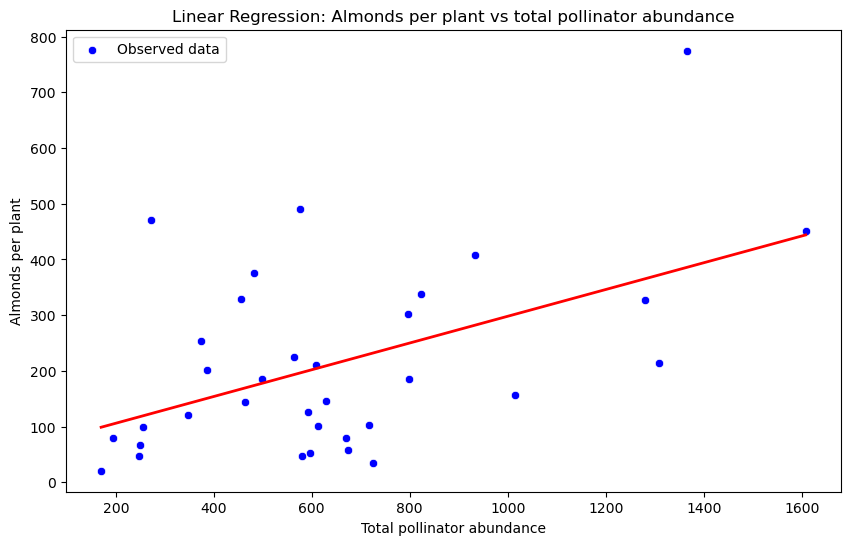

In [13]:
# Train the model on the entire dataset for visualization purposes
model = LinearRegression()
model.fit(X, y)  # X is your feature matrix for 'abundance', y is 'fruits per plant'

# Predict 'fruits per plant' using the model for a range of 'abundance' values
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate a range of values within your dataset's range
y_fit = model.predict(X_fit)  # Predict 'fruits per plant' for the generated range of 'abundance'

# Plot the observed data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['abundance'], y=y, color='blue', label='Observed data')

# Plot the regression line
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Regression line')

# Customize the plot
plt.xlabel('Total pollinator abundance')
plt.ylabel('Almonds per plant')
plt.title('Linear Regression: Almonds per plant vs total pollinator abundance')
plt.legend

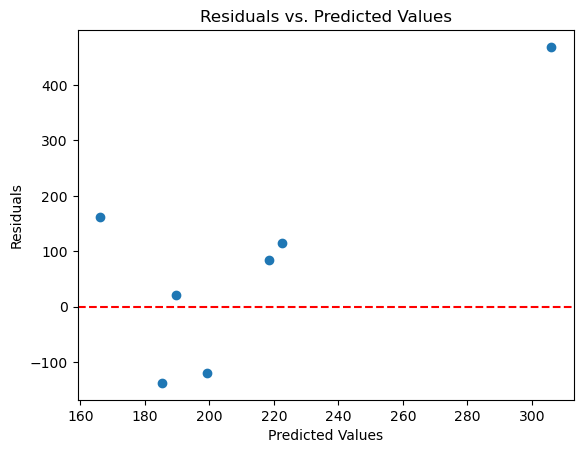

In [14]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Adds a horizontal line at zero
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [19]:
def test_features(df, features, target):
    """
    Test multiple features for linear regression models.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - features: List of feature names to test.
    - target: Name of the target variable.
    
    Returns:
    - A DataFrame with the results of the analysis for each feature.
    """
    # Initialize an empty list to store results
    results = []
    
    for feature in features:
        # Prepare the data
        X = df[[feature]]  # Feature matrix
        y = df[target]  # Target variable
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Create and train the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predict target values for the test set
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        mae = round(mean_absolute_error(y_test, y_pred),2)
        mse = round(mean_squared_error(y_test, y_pred),2)
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),2)
        R2 = round(r2_score(y_test, y_pred),2)
        
        # Append the results
        results.append({
            'Feature': feature,
            'Coefficient': round(model.coef_[0],3),
            'Intercept': round(model.intercept_, 2),
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': R2
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
features_to_test = ['abundance', 'ab_honeybee', 'ab_lepidoptera']
target_column = 'fruits_per_plant'
results_df = test_features(df_almond, features_to_test, target_column)

display(results_df)


,Feature,Coefficient,Intercept,MAE,MSE,RMSE,R2
0,abundance,0.154,96.23,158.14,42842.31,206.98,0.14
1,ab_honeybee,0.191,85.14,153.59,40373.87,200.93,0.19
2,ab_lepidoptera,0.174,189.57,174.98,57777.66,240.37,-0.16
